In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import missingno as msno

## 2. Explore

In [2]:
file_path_1 = '/home/tomas/Documentos/gh-repos/Trabalho-APC-ASN/X_train.csv'
X_train = pd.read_csv(file_path_1)

file_path_2 = '/home/tomas/Documentos/gh-repos/Trabalho-APC-ASN/y_train.csv'
y_train = pd.read_csv(file_path_2)

file_path_3 ='/home/tomas/Documentos/gh-repos/Trabalho-APC-ASN/X_val.csv'
X_val = pd.read_csv(file_path_3)

file_path_4 = '/home/tomas/Documentos/gh-repos/Trabalho-APC-ASN/y_val.csv'
y_val = pd.read_csv(file_path_4)

file_path_5 = '/home/tomas/Documentos/gh-repos/Trabalho-APC-ASN/X_test.csv'
X_test = pd.read_csv(file_path_5)

file_path_6 = '/home/tomas/Documentos/gh-repos/Trabalho-APC-ASN/y_test.csv'
y_test = pd.read_csv(file_path_6)

### Análise Univariada

**Variável Resposta: BAD**

In [3]:
print('Distribuição da target')
print(y_train.value_counts(normalize=True))
print()
print(f'Qtd de valores nulos: {y_train.isna().sum()}')

Distribuição da target
BAD
0      0.799217
1      0.200783
Name: proportion, dtype: float64

Qtd de valores nulos: BAD    0
dtype: int64


**Variáveis Preditoras**

In [4]:
display(X_train)

cat_var = X_train.select_dtypes(exclude=np.number).columns.tolist()

num_var = X_train.select_dtypes(include=np.number).columns.tolist()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5273,28800,NaN,44761.0,DebtCon,Other,10.0,0.0,NaN,84.728268,NaN,14.0,22.841663
370,6300,45582.0,89005.0,DebtCon,NaN,2.0,0.0,0.0,209.358047,4.0,30.0,29.595956
4994,26500,23742.0,77878.0,DebtCon,Other,NaN,2.0,1.0,99.377168,2.0,26.0,28.876724
408,6500,55000.0,88300.0,HomeImp,Office,29.0,0.0,0.0,234.400000,1.0,17.0,NaN
5221,28200,66242.0,109762.0,DebtCon,Other,8.0,0.0,1.0,130.969565,0.0,21.0,60.295413
...,...,...,...,...,...,...,...,...,...,...,...,...
3602,18900,44605.0,65489.0,DebtCon,ProfExe,15.0,0.0,0.0,189.008456,0.0,23.0,38.571083
2579,15000,116000.0,202800.0,DebtCon,Other,3.5,0.0,0.0,202.966667,0.0,17.0,NaN
2235,13700,96597.0,120380.0,DebtCon,ProfExe,13.0,0.0,0.0,181.404850,1.0,17.0,34.315437
572,7500,NaN,NaN,HomeImp,Other,21.0,NaN,NaN,158.900000,1.0,21.0,NaN


**Variáveis Numéricas**

In [5]:
X_train[num_var]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5273,28800,NaN,44761.0,10.0,0.0,NaN,84.728268,NaN,14.0,22.841663
370,6300,45582.0,89005.0,2.0,0.0,0.0,209.358047,4.0,30.0,29.595956
4994,26500,23742.0,77878.0,NaN,2.0,1.0,99.377168,2.0,26.0,28.876724
408,6500,55000.0,88300.0,29.0,0.0,0.0,234.400000,1.0,17.0,NaN
5221,28200,66242.0,109762.0,8.0,0.0,1.0,130.969565,0.0,21.0,60.295413
...,...,...,...,...,...,...,...,...,...,...
3602,18900,44605.0,65489.0,15.0,0.0,0.0,189.008456,0.0,23.0,38.571083
2579,15000,116000.0,202800.0,3.5,0.0,0.0,202.966667,0.0,17.0,NaN
2235,13700,96597.0,120380.0,13.0,0.0,0.0,181.404850,1.0,17.0,34.315437
572,7500,NaN,NaN,21.0,NaN,NaN,158.900000,1.0,21.0,NaN


In [6]:
# Function to create a histogram, a Q-Q plot and a boxplot.


def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(14, 5))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=variable)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(data = df, y=variable)
    plt.title('Boxplot')
    
    plt.suptitle(variable, fontsize='xx-large', fontweight='medium')

    plt.show()

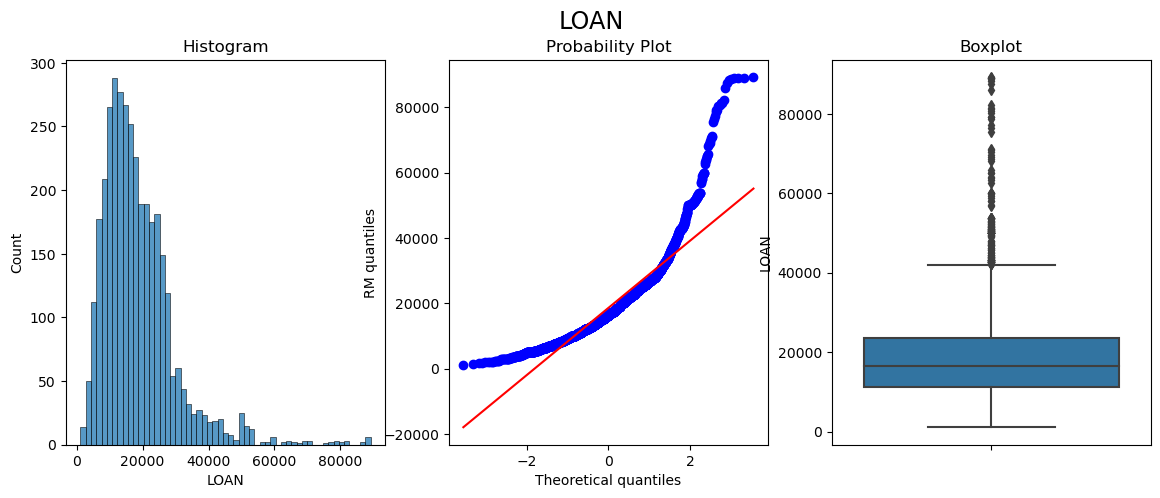

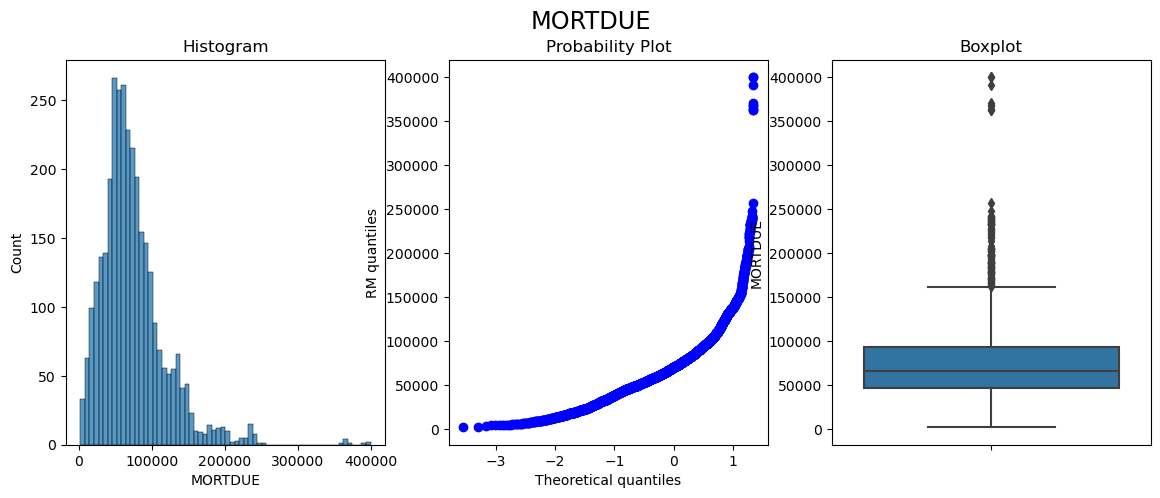

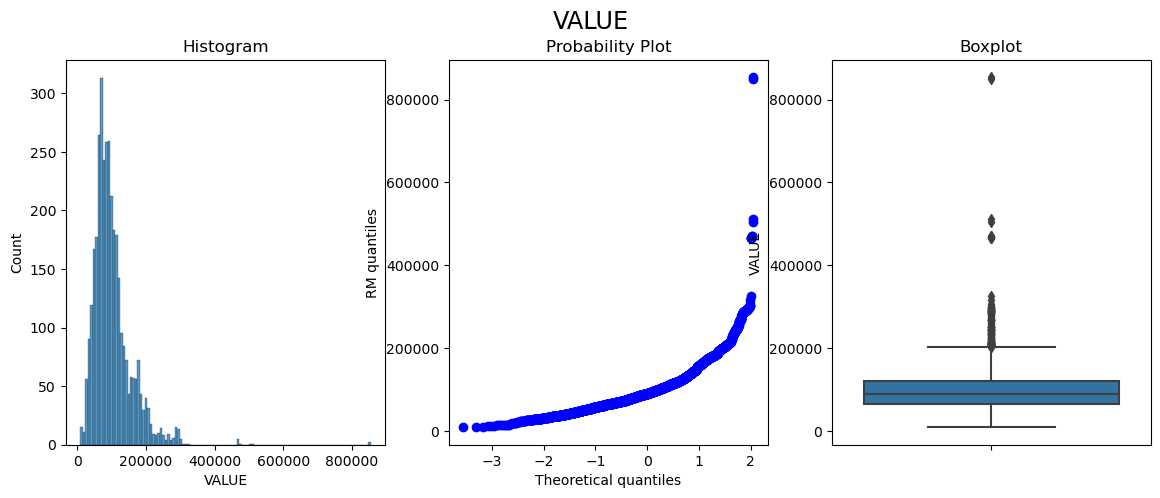

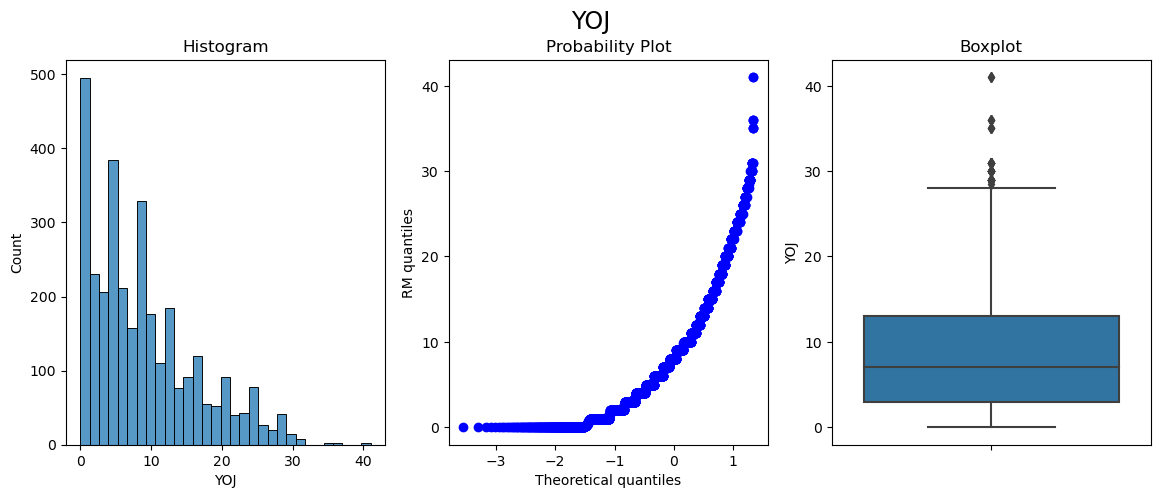

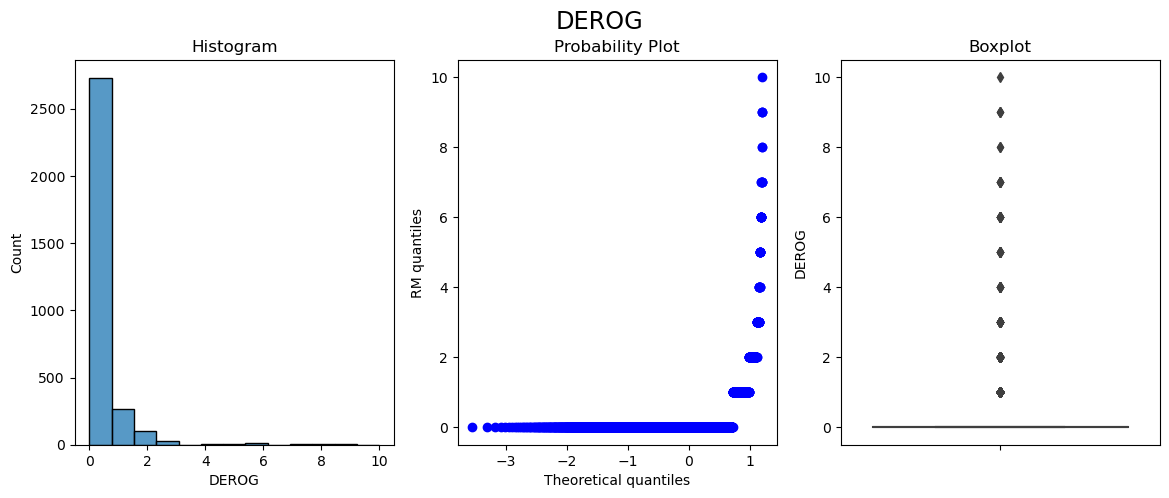

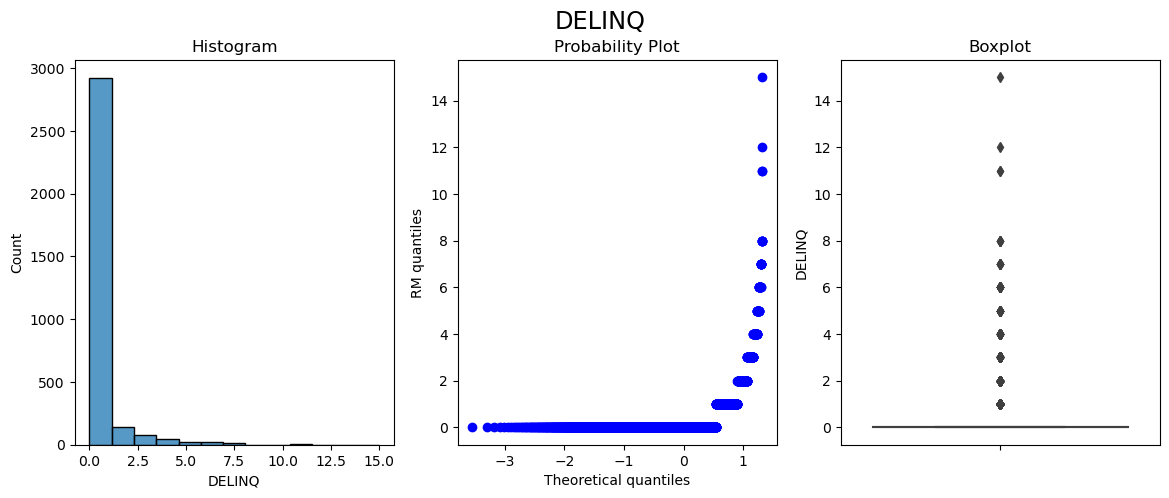

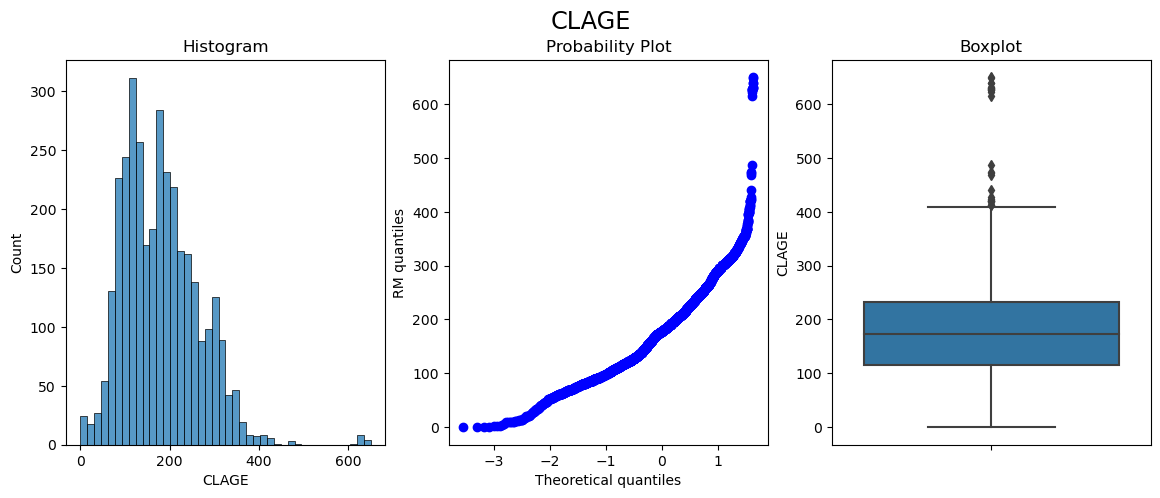

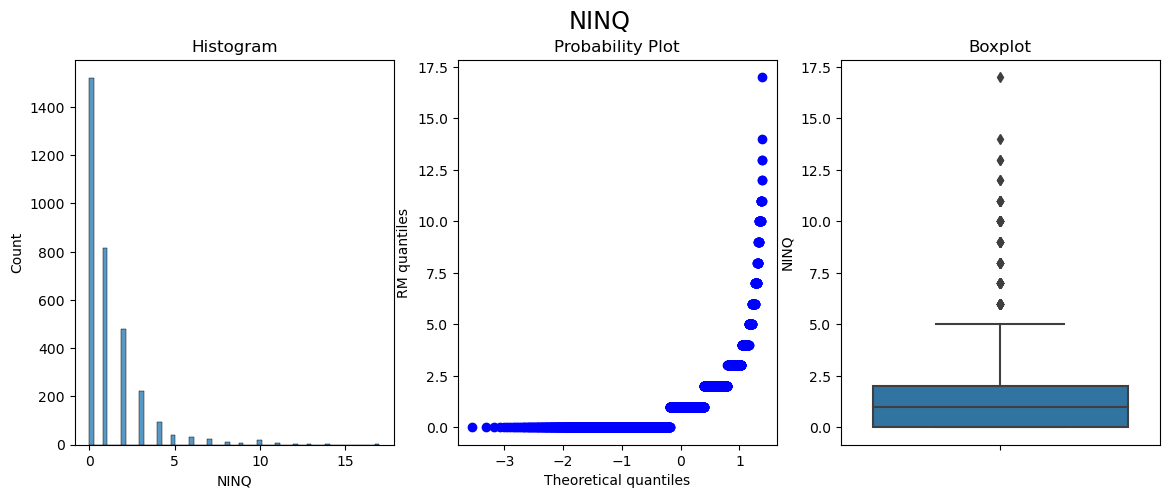

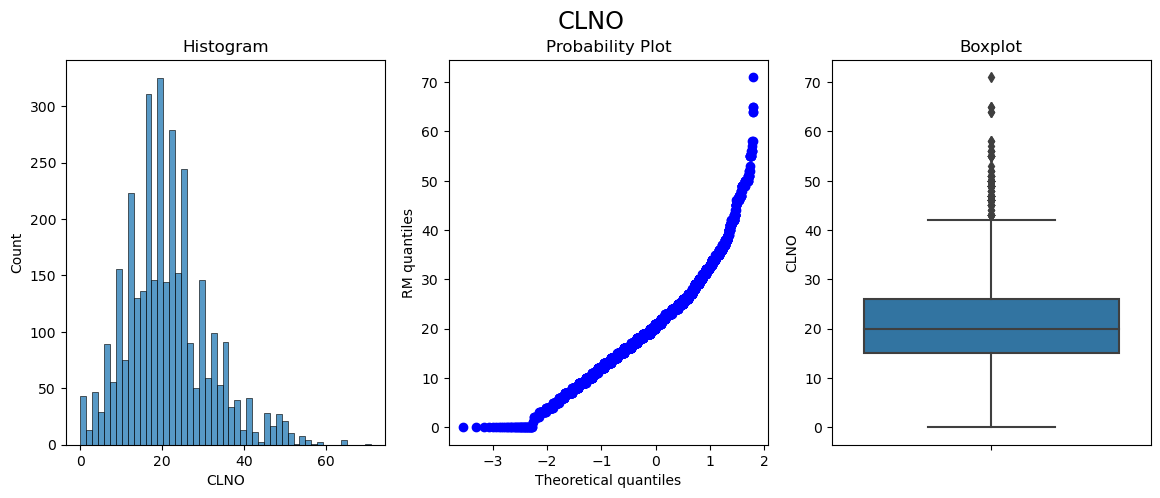

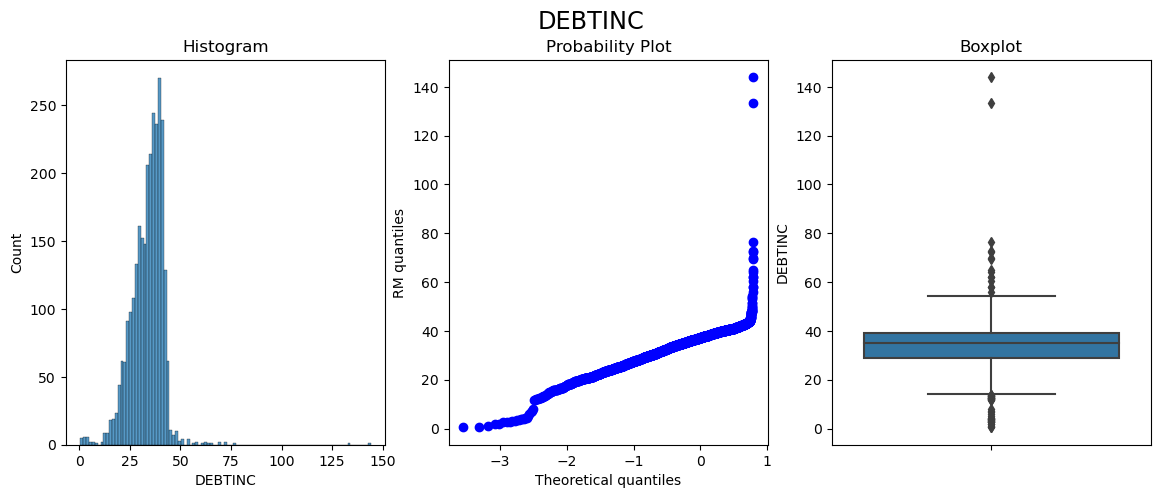

In [7]:
for variable in num_var:
    diagnostic_plots(X_train, variable)

**Variáveis Categóricas**

In [8]:
X_train[cat_var]

,REASON,JOB
5273,DebtCon,Other
370,DebtCon,NaN
4994,DebtCon,Other
408,HomeImp,Office
5221,DebtCon,Other
...,...,...
3602,DebtCon,ProfExe
2579,DebtCon,Other
2235,DebtCon,ProfExe
572,HomeImp,Other


In [9]:
print('====  Frequencia das categorias em %  ====')
for var in cat_var:
    print(X_train[var].value_counts(normalize=True)*100)
    print()


serie = X_train[cat_var].isna()
print('====  Valores Faltantes  ====')
pd.DataFrame(index=cat_var, data={'Qtd':serie.sum().values, 'Pct_%':serie.mean().values*100})

====  Frequencia das categorias em %  ====
REASON
DebtCon    69.215057
HomeImp    30.784943
Name: proportion, dtype: float64

JOB
Other      42.464150
ProfExe    21.861282
Office     16.213052
Mgr        14.193737
Self        3.453322
Sales       1.814457
Name: proportion, dtype: float64

====  Valores Faltantes  ====


,Qtd,Pct_%
REASON,149,4.166667
JOB,159,4.446309


### Análise Bivariada

**Variáveis Numéricas**

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


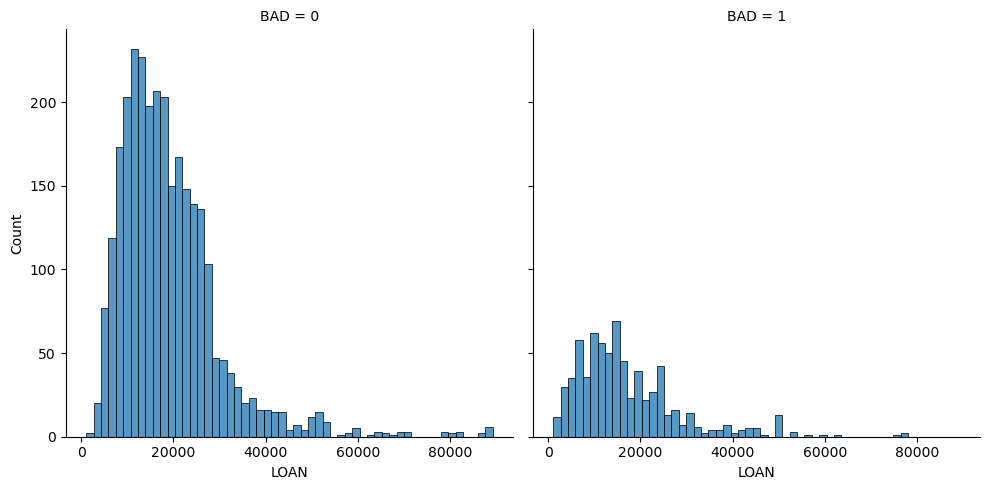

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


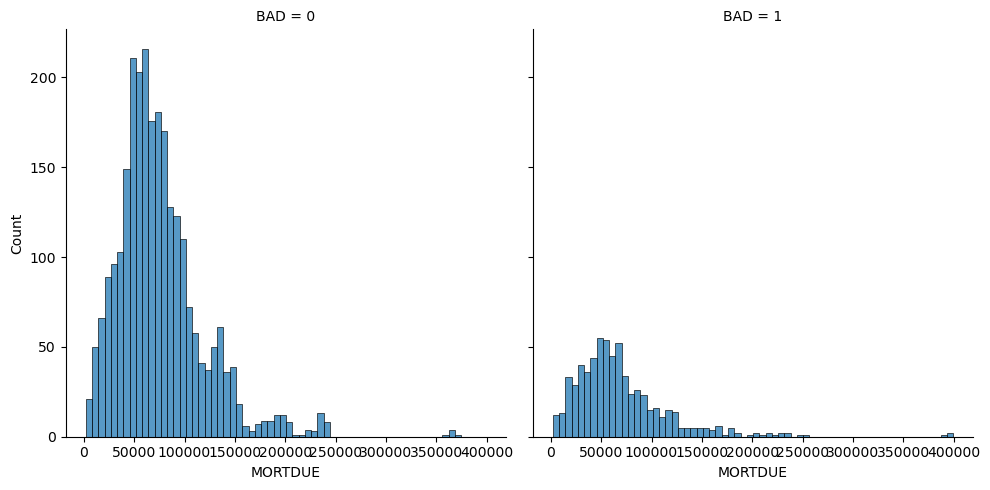

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


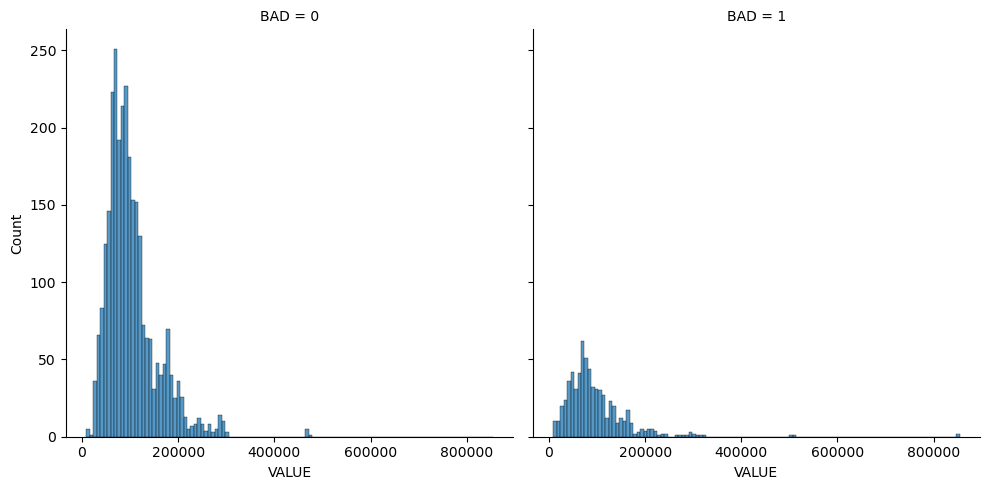

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


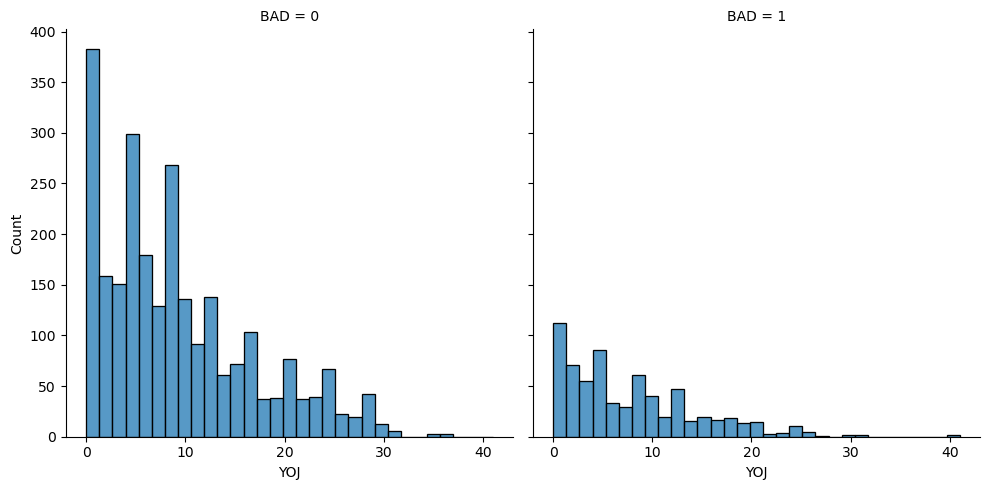

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


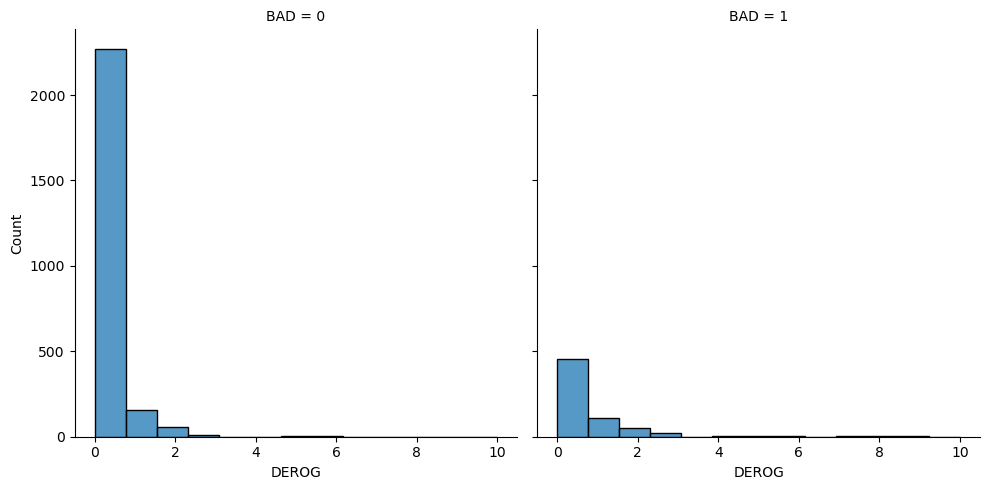

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


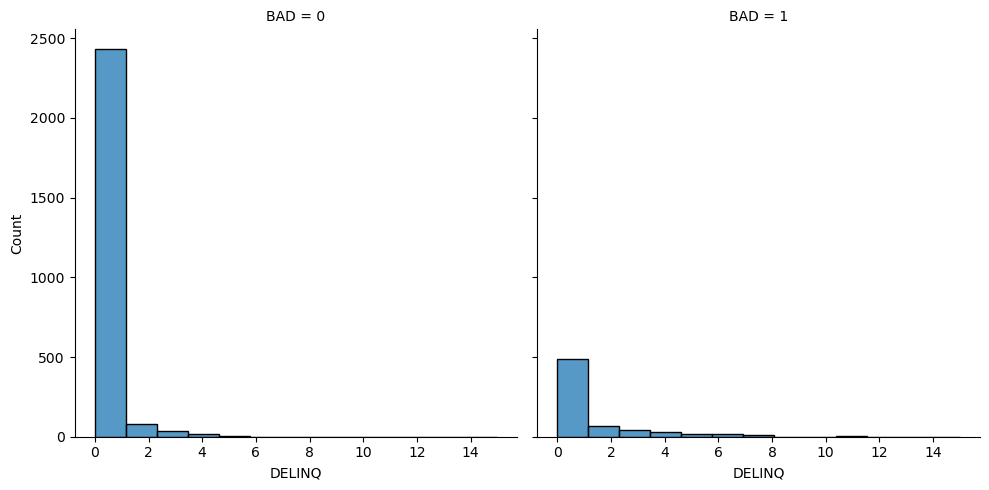

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


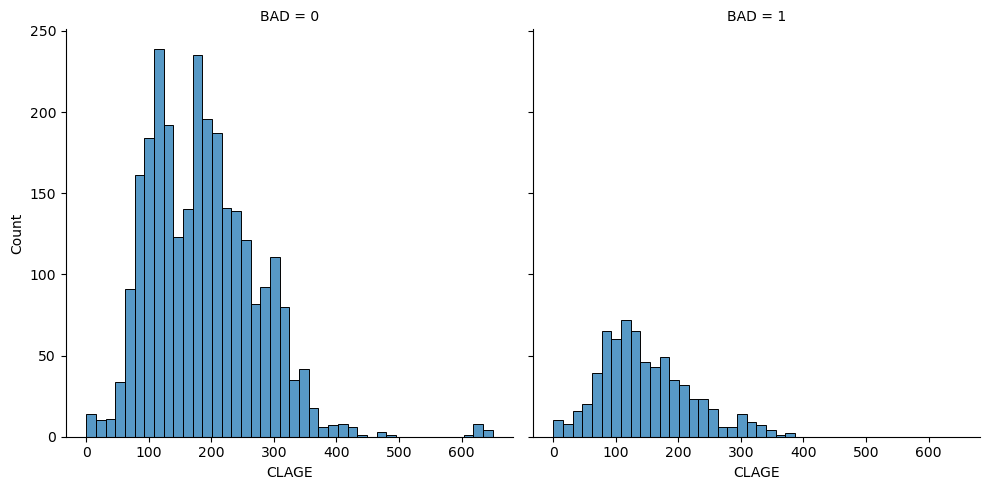

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


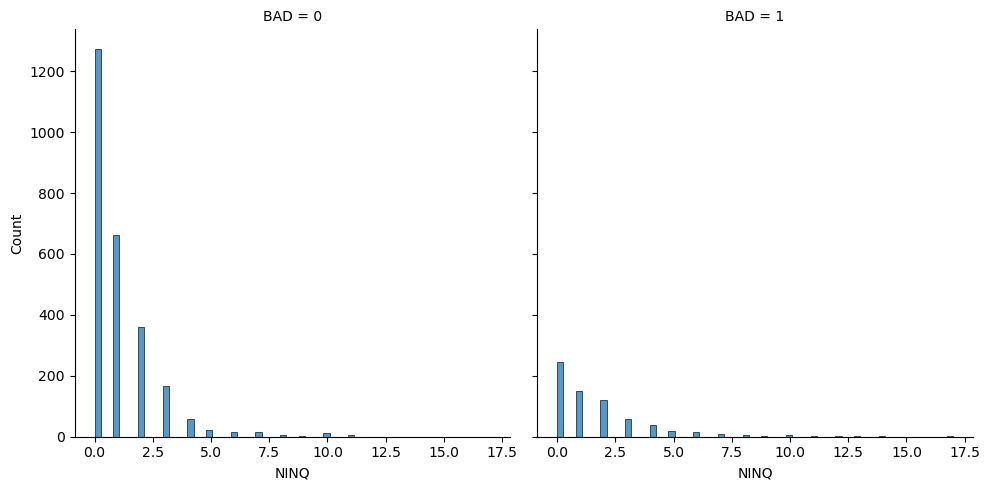

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


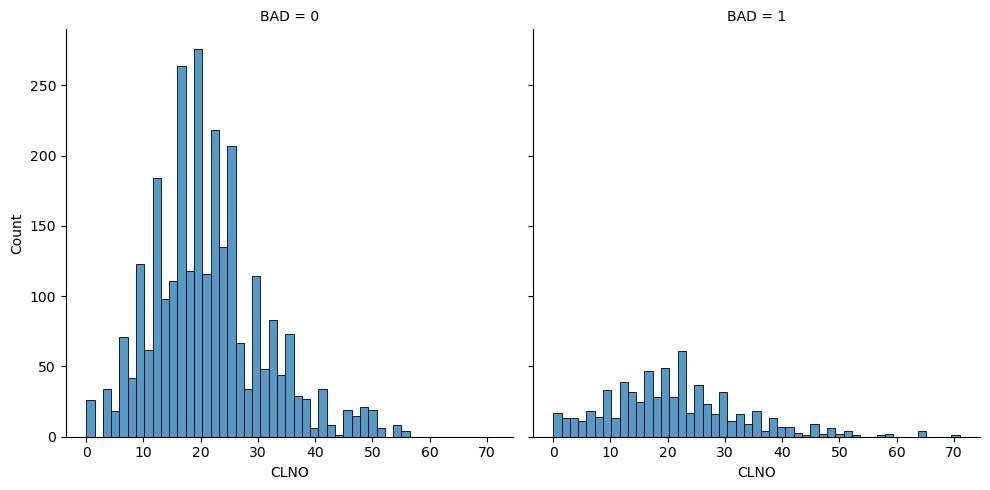

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


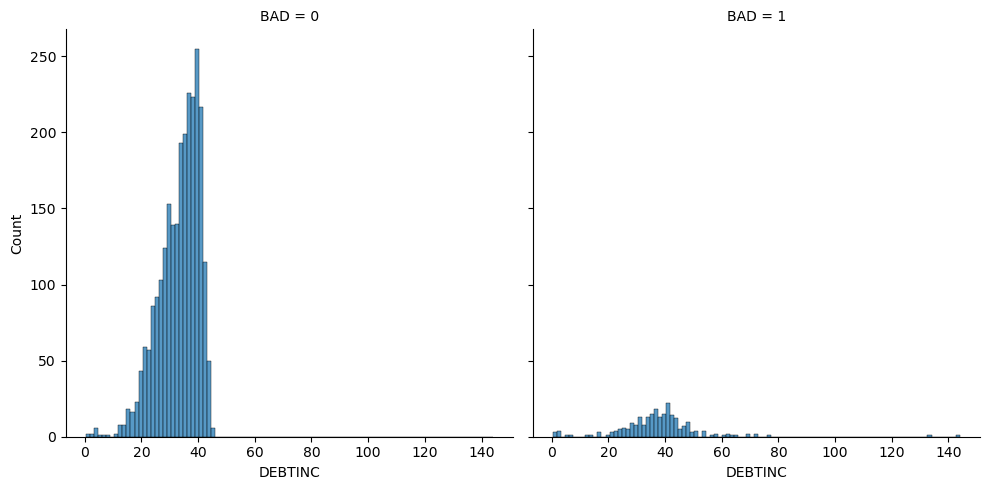

In [10]:
def dist_var(X, y, variable):
    data = X[[variable]].assign(BAD=y)
    
    sns.displot(data=data, x=variable,  col="BAD", kind="hist")
    plt.show()


for var in num_var:
    dist_var(X_train, y_train, var)

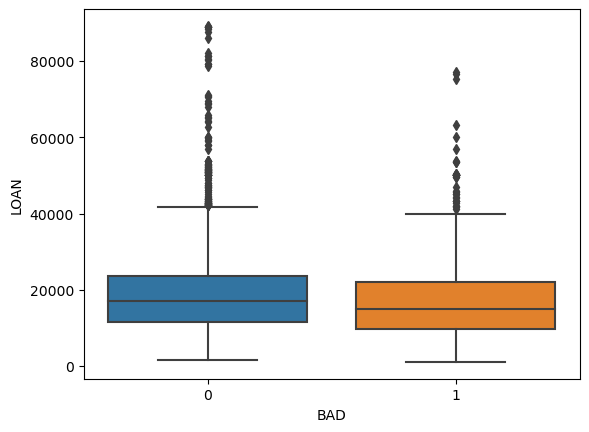

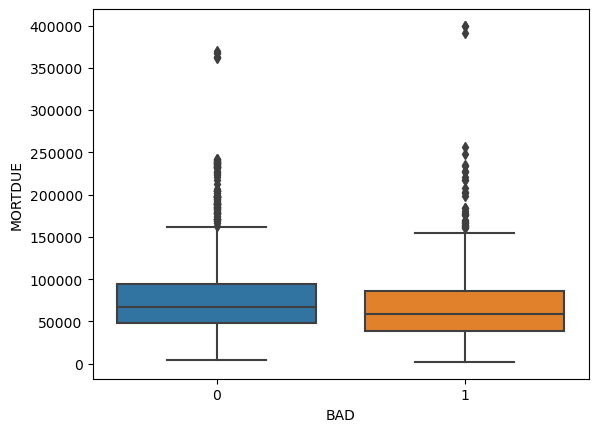

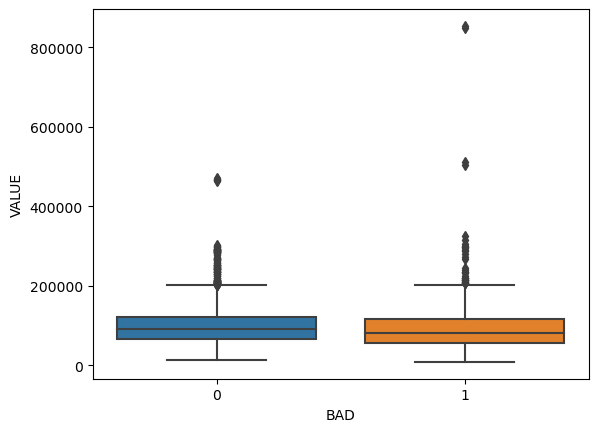

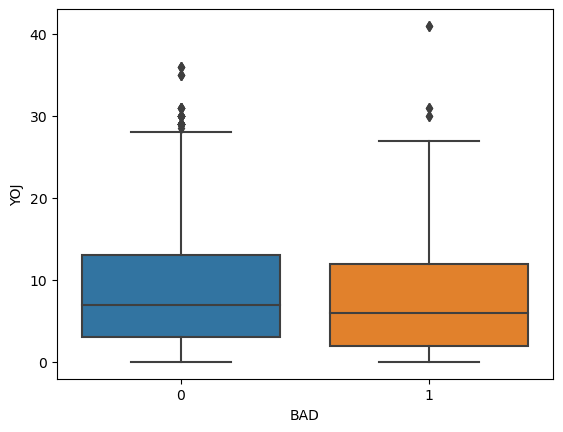

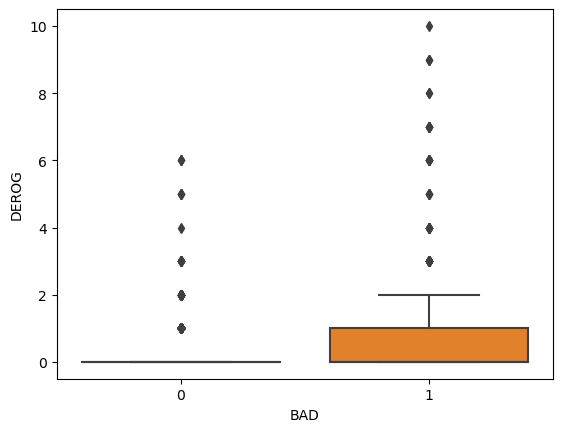

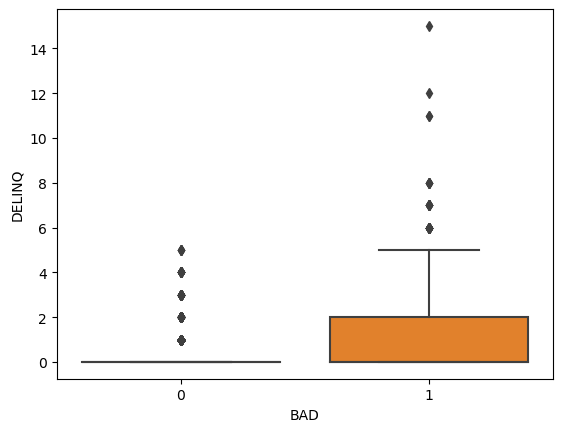

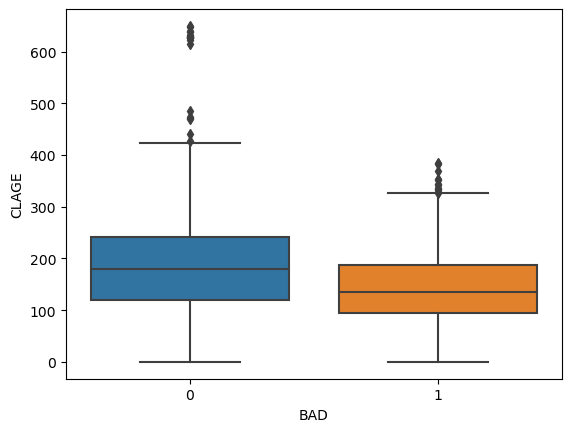

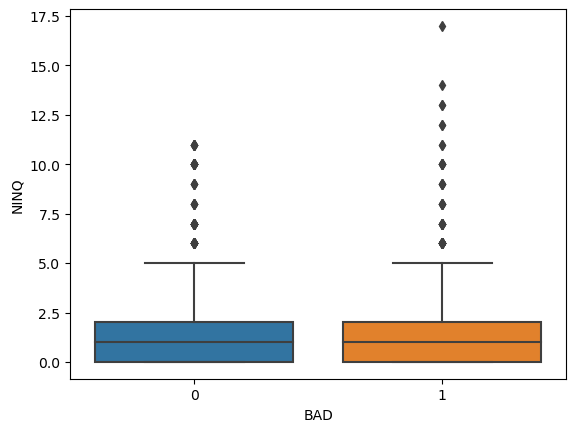

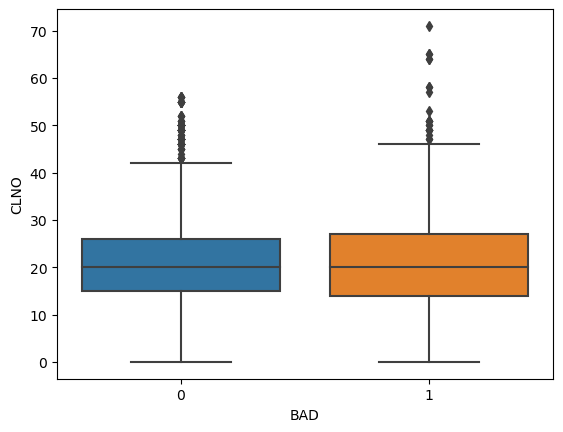

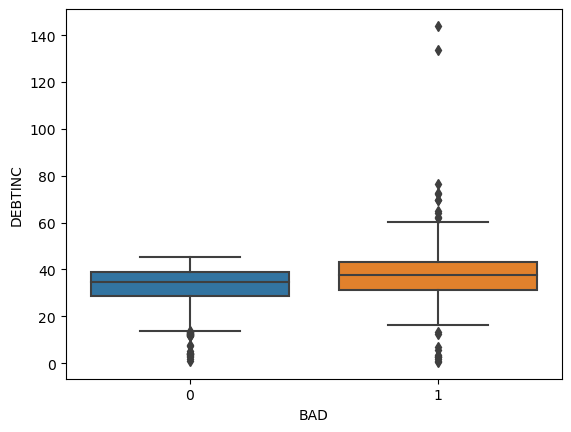

In [11]:
def violin_plot(X, y, variable):
    data = X[[variable]].assign(BAD=y)
    
    sns.boxplot(data=data, y=variable,  x='BAD')
    plt.show()


for var in num_var:
    violin_plot(X_train, y_train, var)

In [12]:
def verifica_linearidade(df_x, y):

    # Verifica se há uma relação linear entre a variável preditora numérica e a variável resposta
    # Plotando um gráfico com a taxa de resposta no eixo y 
    # E o percentil no eixo X



    df = pd.concat([df_x, y], axis=1)
    df = df.dropna()
    df_sorted = df.sort_values(by=df.columns[0])


    # Step 2: Calculate percentiles of the numeric variable (1% intervals)
    percentiles = np.arange(0, 101, 1)
    percentile_values = np.percentile(df_sorted[df.columns[0]], percentiles)

    # Step 3: Calculate the mean of the binary variable for each percentile
    result = []
    for i in range(len(percentiles) - 1):
        start = percentiles[i]
        end = percentiles[i + 1]
        percentile_df = df_sorted[(df_sorted[df.columns[0]] >= percentile_values[i]) &
                                (df_sorted[df.columns[0]] <= percentile_values[i + 1])]
        mean_binary = percentile_df[df.columns[1]].mean()
        result.append({'Percentile_Start': start, 'Percentile': end, 'Mean_Binary': mean_binary})

    # Create a new DataFrame from the result
    result_df = pd.DataFrame(result)
    sns.scatterplot(data=result_df, x=result_df.columns[1], y=result_df.columns[2])
    plt.title(df.columns[0])
    plt.show()

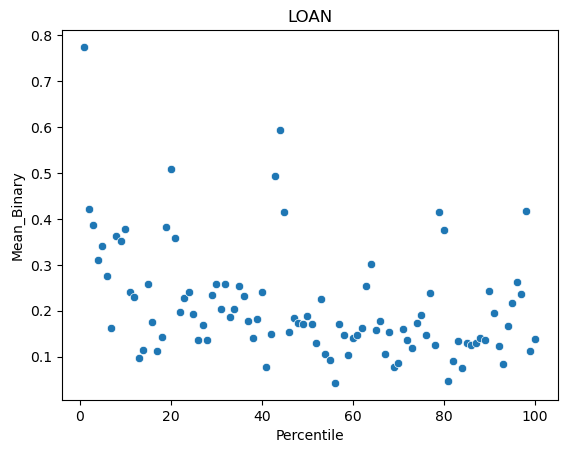

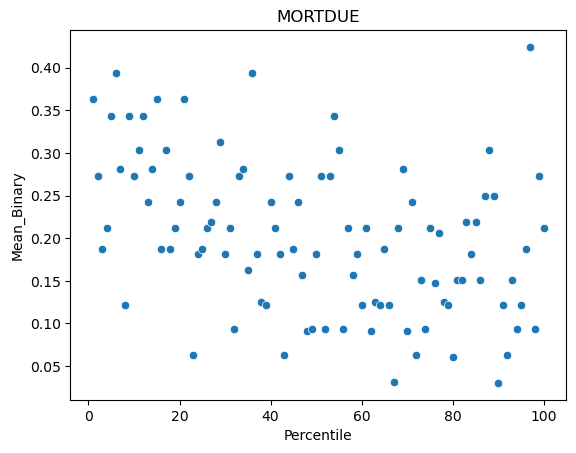

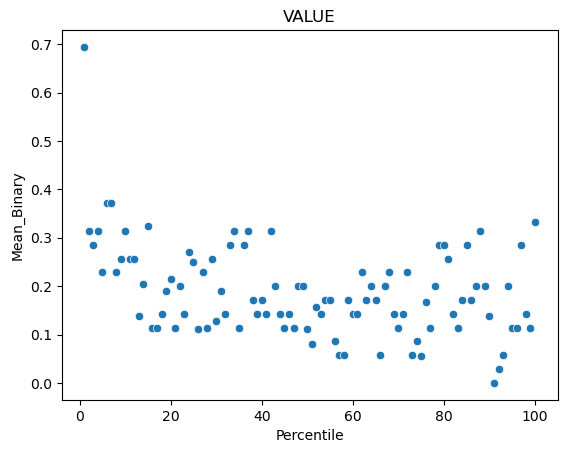

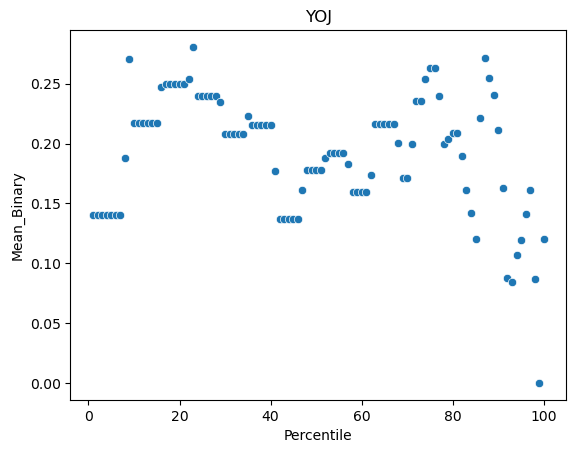

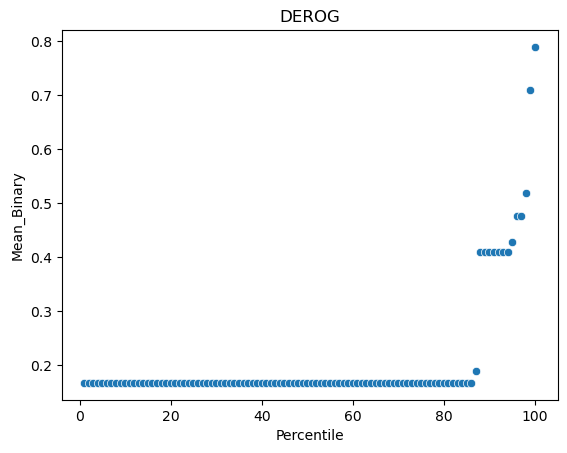

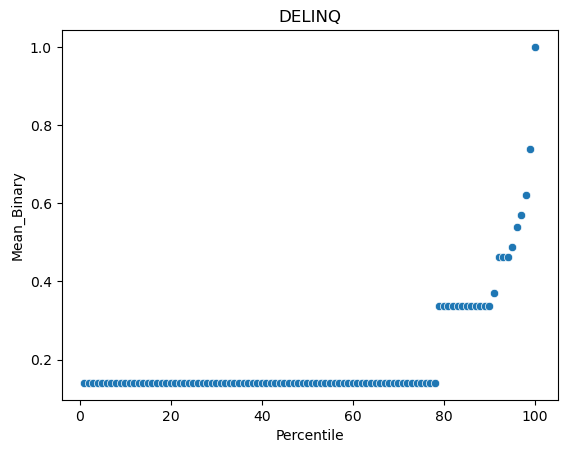

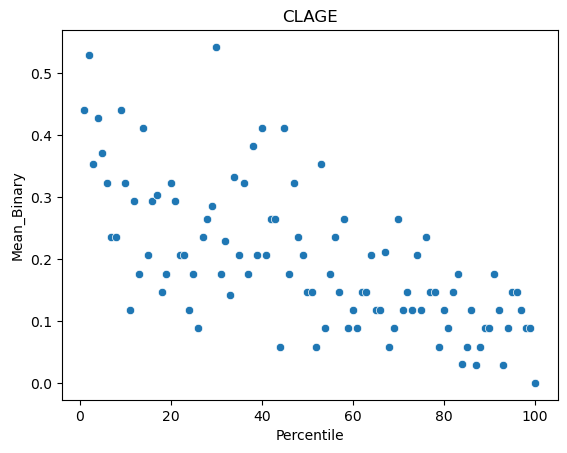

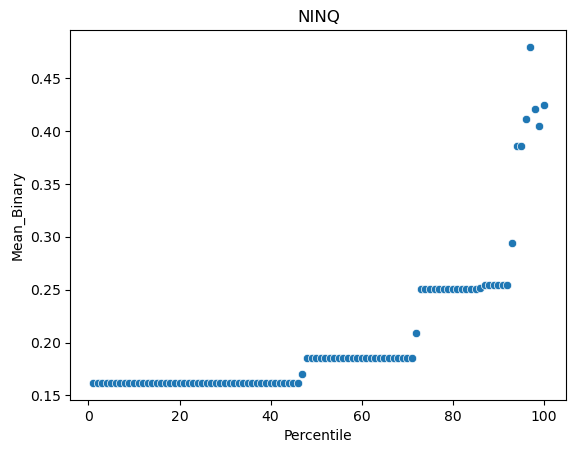

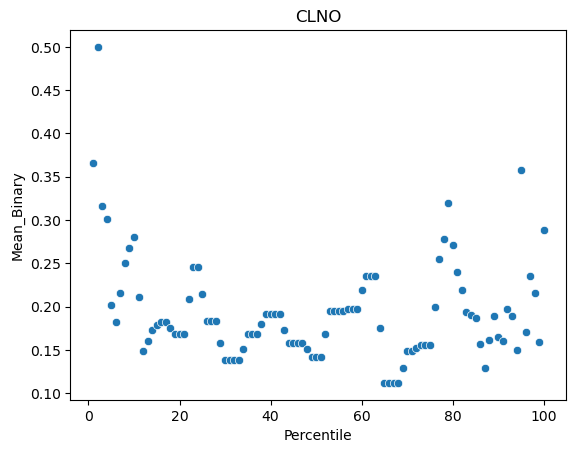

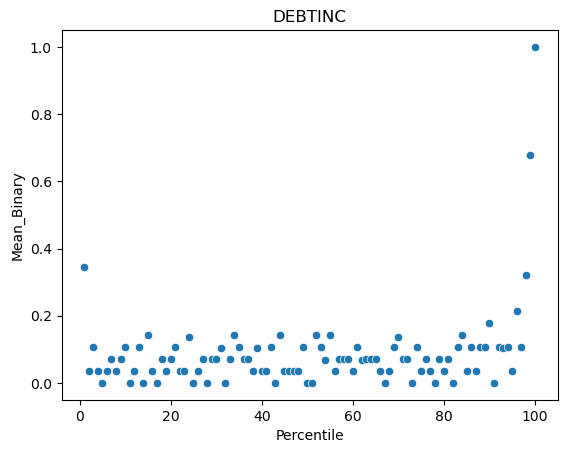

In [13]:
for var in num_var:
    verifica_linearidade(X_train[[var]], y_train)

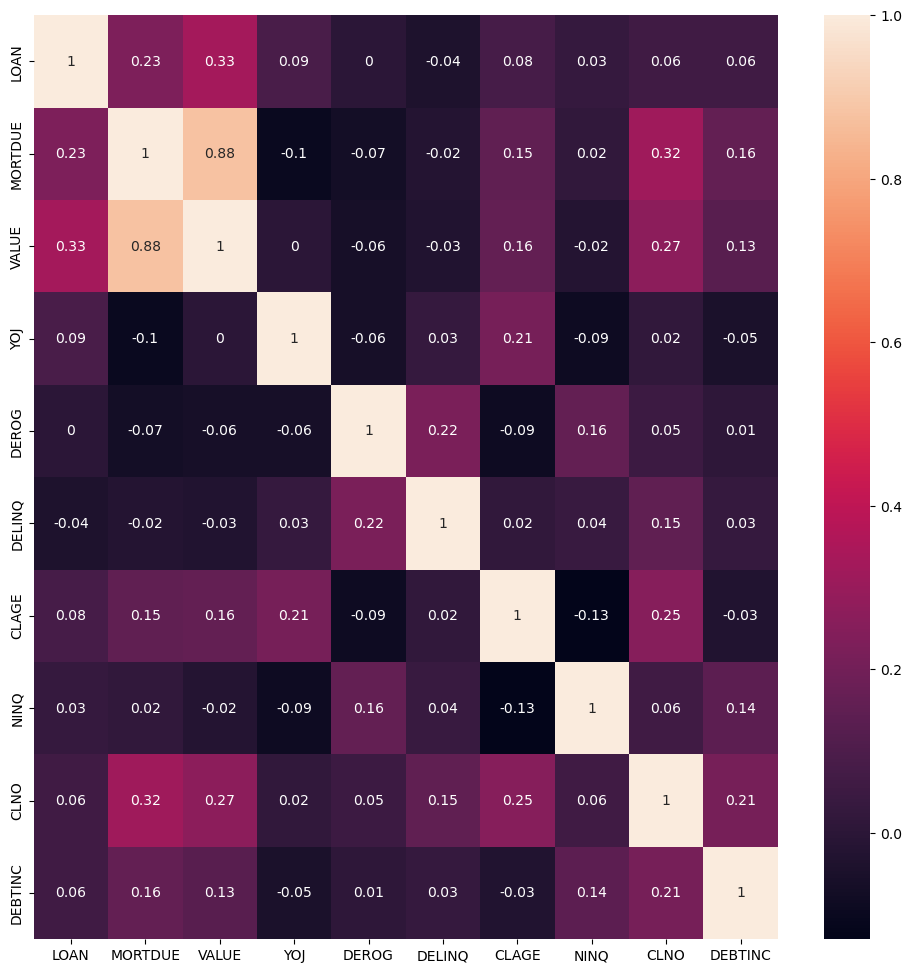

In [14]:
correlation_matrix = X_train[num_var].corr().round(2)


figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Avaliando Discretização**

In [15]:
def calculate_woe(df_x, variable, df_target):
    # Combine the predictor variable with the target variable into a single dataframe
    combined_df = pd.concat([df_x[variable], df_target], axis=1)
    combined_df.columns = [variable, 'target']

    # Create a contingency table
    contingency_table = combined_df.groupby([variable, 'target']).size().unstack(fill_value=0)

    # Count the number of 'good' and 'bad'
    total_good = df_target.value_counts().get(0, 0)
    total_bad = df_target.value_counts().get(1, 0)

    # Calculate the WoE for each category and add it to the contingency table
    contingency_table['WoE'] = np.log((contingency_table[1] / total_bad) / (contingency_table[0] / total_good))

    # Replace 'inf' with a very large positive or negative value
    contingency_table['WoE'].replace([np.inf, -np.inf], [1e30, -1e30], inplace=True)

    # Calculate IV, handling cases where counts are zero
    iv_values = ((contingency_table[0] / total_good) - (contingency_table[1] / total_bad)) * contingency_table['WoE']
    iv_values.replace([np.inf, -np.inf], [0, 0], inplace=True)
    contingency_table['IV'] = iv_values.sum()

    return contingency_table[['WoE', 'IV']]

In [16]:
from feature_engine.imputation import EndTailImputer, CategoricalImputer, AddMissingIndicator
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.discretisation import DecisionTreeDiscretiser

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

X_train_temp = X_train.select_dtypes(include=np.number)
#
#
#
#
End_Tail_Imputer = EndTailImputer(imputation_method = 'gaussian', 
                                  tail = 'right', 
                                  fold = 3, 
                                  variables = ['VALUE', 'DEBTINC'])
#
#
#
#
#
variables = ['LOAN', 'MORTDUE',
             'YOJ', 'DEROG',
             'DELINQ', 'CLAGE',
             'NINQ', 'CLNO']
#
#
#
#
_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=59),
                           max_iter=1000,
                           random_state=59)
#
imputer_knn = SklearnTransformerWrapper(transformer=_nonLin, variables=variables)
#
#
#
#
treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=num_var,
                                   regression=False,
                                   param_grid={'min_samples_leaf': [100]}
                                   )
#
#
#
#
pipeline = Pipeline([('EndTailImputer', End_Tail_Imputer),
                     ('ImputerNonLin', imputer_knn),
                     ('TreeDiscretiser', treeDisc),])
#
#
#
#
pipeline.fit(X_train_temp, y_train)

X_train_temp = pipeline.transform(X_train_temp)

print(f'====  Information Value das Variáveis Discretizadas  ====')
print()
for _ in X_train_temp.columns.tolist():
    print(f"{_}: {calculate_woe(X_train_temp, _, y_train).iloc[0]['IV']}")
    

/home/tomas/anaconda3/envs/apc-asn/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


====  Information Value das Variáveis Discretizadas  ====

LOAN: -0.40570380077971
MORTDUE: -0.2337567867429199
VALUE: -0.533288491024919
YOJ: -0.14261400121956203
DEROG: -0.28085363074132336
DELINQ: -0.5482019939746667
CLAGE: -0.3684806875308118
NINQ: -0.13445441105705913
CLNO: -0.12092682383899023
DEBTINC: -2.170093938383354


In [25]:
X_train[num_var].isna().sum()

LOAN         0
MORTDUE    320
VALUE       71
YOJ        321
DEROG      409
DELINQ     333
CLAGE      181
NINQ       294
CLNO       126
DEBTINC    762
dtype: int64

In [24]:
X_train[num_var].describe().loc['min']

LOAN       1100.000000
MORTDUE    2063.000000
VALUE      8800.000000
YOJ           0.000000
DEROG         0.000000
DELINQ        0.000000
CLAGE         0.000000
NINQ          0.000000
CLNO          0.000000
DEBTINC       0.524499
Name: min, dtype: float64

**Variáveis Categóricas**

In [17]:
for _ in X_train[cat_var].columns.tolist():
    display(calculate_woe(X_train[cat_var], _, y_train))

target,WoE,IV
REASON,,
DebtCon,-0.070466,-0.008542
HomeImp,0.131689,-0.008542


target,WoE,IV
JOB,,
Mgr,0.143167,-0.078003
Office,-0.519870,-0.078003
Other,0.205005,-0.078003
ProfExe,-0.204125,-0.078003
Sales,0.487590,-0.078003
Self,0.476952,-0.078003


In [45]:
calculate_woe(X_train_temp, 'LOAN', y_train)

target,WoE,IV
LOAN,,
0.125000,-5.645024e-01,-1.671309e+28
0.125234,-5.623679e-01,-1.671309e+28
0.153333,-3.272851e-01,-1.671309e+28
0.162500,-2.583355e-01,-1.671309e+28
0.164844,-2.412130e-01,-1.671309e+28
0.207176,3.937476e-02,-1.671309e+28
0.250000,2.827955e-01,-1.671309e+28
0.305085,5.582075e-01,-1.671309e+28
0.318584,6.211213e-01,-1.671309e+28


### Valores Faltantes

In [31]:
null_cols = X_train.isna().sum()[X_train.isna().sum() > 0].index.tolist()

### Valores Faltantes
print('====  VALORES FALTANTES  ====')

data = {'Qtd':X_train[null_cols].isna().sum().values, 'Pct_%':X_train[null_cols].isna().mean().values*100}
df_null_cont = pd.DataFrame(index=null_cols, data=data)
display(df_null_cont)

====  VALORES FALTANTES  ====


,Qtd,Pct_%
MORTDUE,320,8.948546
VALUE,71,1.985459
REASON,149,4.166667
JOB,159,4.446309
YOJ,321,8.976510
DEROG,409,11.437360
DELINQ,333,9.312081
CLAGE,181,5.061521
NINQ,294,8.221477
CLNO,126,3.523490


In [38]:
from feature_engine.imputation import AddMissingIndicator

df_temp = X_train

addBinary_imputer = AddMissingIndicator( variables = X_train.columns.tolist() )

# fit the imputer
addBinary_imputer.fit(df_temp)

df_temp = addBinary_imputer.transform(df_temp)

df_temp.drop(axis=1, labels=X_train.columns.tolist(), inplace=True)
df_temp = df_temp.astype('object')


print(f'====  Information Value das Variáveis Flag de faltante  ====')
print()
for _ in df_temp.columns:
    print(f"{_}: {calculate_woe(df_temp, _, y_train).iloc[0]['IV']}")

====  Information Value das Variáveis Flag de faltante  ====

MORTDUE_na: -0.0005140800056240904
VALUE_na: -0.3657667105774361
REASON_na: -0.0006981983771397556
JOB_na: -0.023245293896884168
YOJ_na: -0.03674791111381227
DEROG_na: -0.031668570131126
DELINQ_na: -0.021679825083537003
CLAGE_na: -0.00542965052757722
NINQ_na: -0.014839868229175088
CLNO_na: -0.0027009382205258232
DEBTINC_na: -1.5747038372855742


**Métodos de imputação**

EndTailImputer
- VALUE 
- DEBTINC

CategoricalImputer
- REASON
- JOB

AddMissingIndicator + IterativeImputer
- LOAN
- MORTDUE
- REASON
- JOB
- YOJ
- DEROG
- DELINQ
- CLAGE
- NINQ
- CLNO